In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Titanic training and testing datasets
titanic_train = pd.read_csv("Titanic_train.csv")
test_data = pd.read_csv("Titanic_test.csv")

In [ ]:
# Display the first few rows of the training dataset
print("Dataset Preview:")
print(titanic_train.head())

Dataset Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [ ]:
# Display the first few rows of the testing dataset
print("Dataset Preview:")
print(test_data.head())

Dataset Preview:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [ ]:
# Check for missing values in train data
print("\nMissing Values:")
print(titanic_train.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Check for missing values in test data
print("\nMissing Values:")
print(test_data.isnull().sum())


Missing Values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# Summary statistics of train data
print("\nSummary Statistics:")
print(titanic_train.describe())


Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
# Summary statistics of test data
print("\nSummary Statistics:")
print(test_data.describe())


Summary Statistics:
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


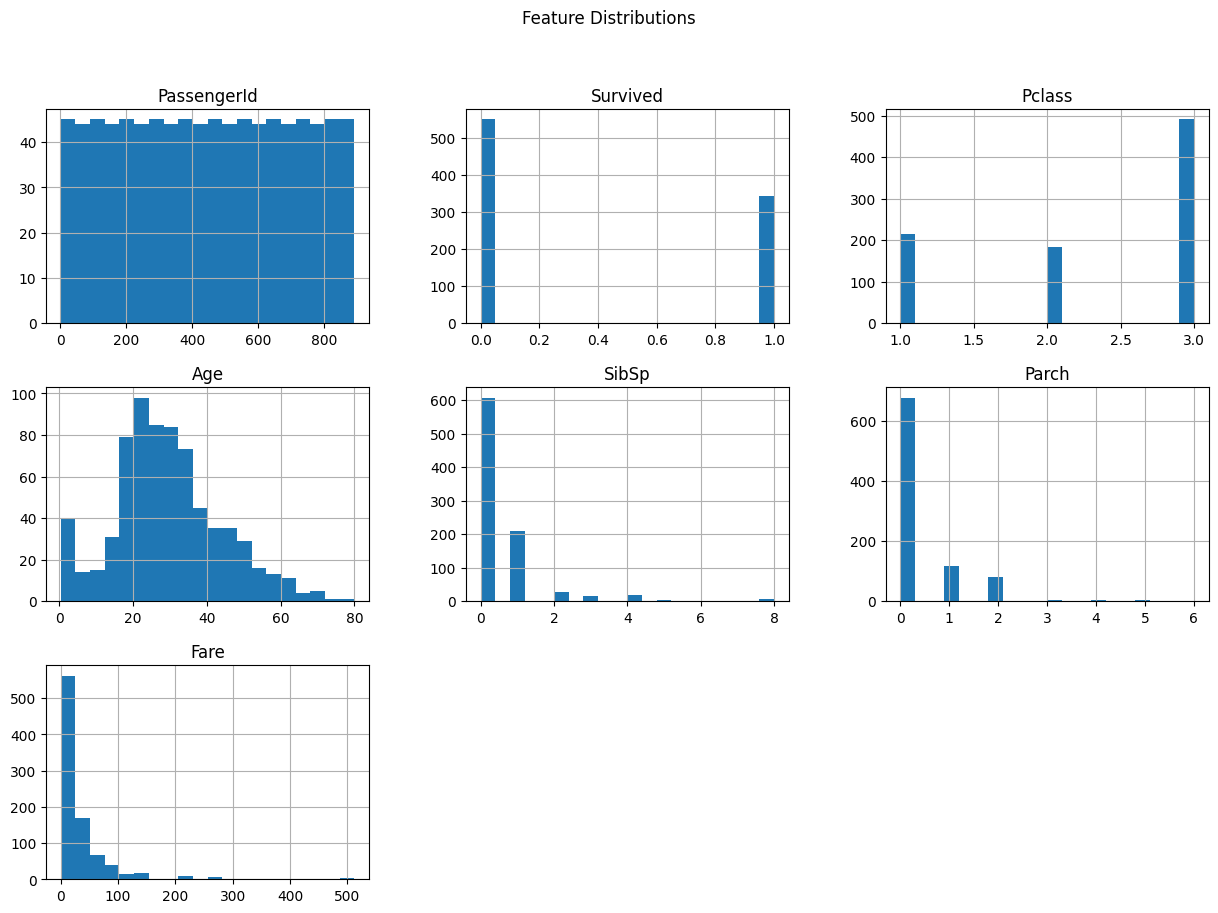

In [ ]:
# Visualize data distributions using histograms
titanic_train.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

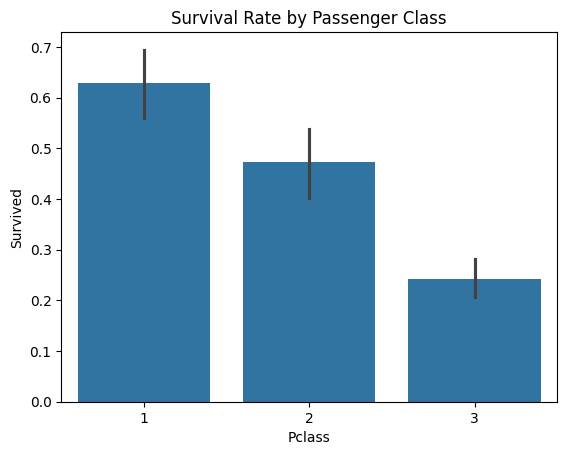

In [ ]:
# Visualize relationships between features and survival
sns.barplot(x='Pclass', y='Survived', data=titanic_train)
plt.title("Survival Rate by Passenger Class")
plt.show()

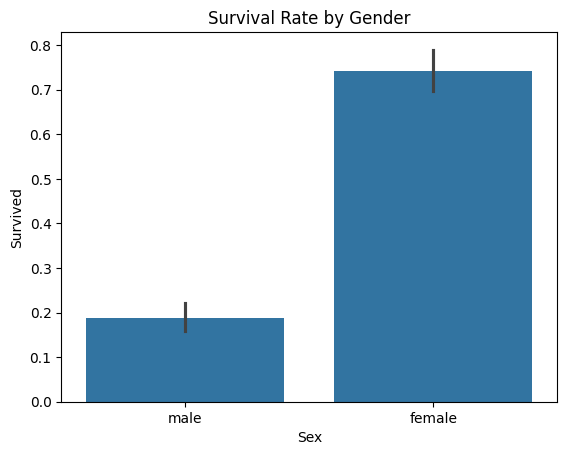

In [ ]:
sns.barplot(x='Sex', y='Survived', data=titanic_train)
plt.title("Survival Rate by Gender")
plt.show()

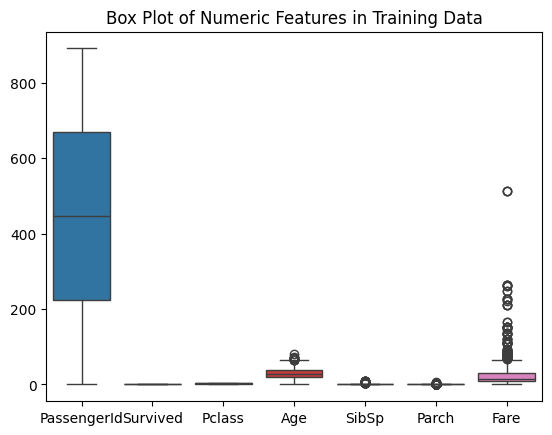

In [ ]:
# box plot
sns.boxplot(data=titanic_train.select_dtypes(include=np.number))
plt.title("Box Plot of Numeric Features in Training Data")
plt.show()

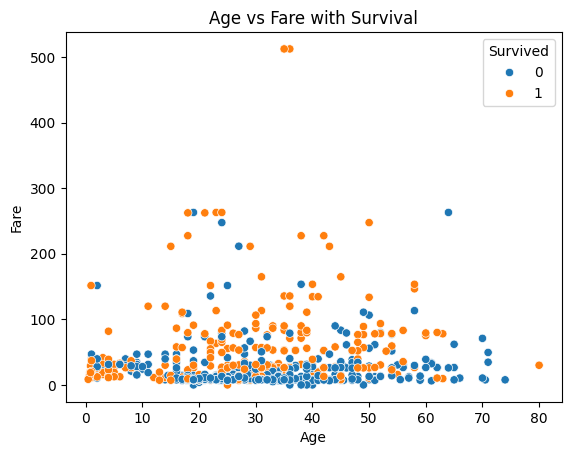

In [ ]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_train)
plt.title("Age vs Fare with Survival")
plt.show()

Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
# Preprocessing function
def preprocess_data(data):
    # Encode categorical variables
    label_encoder = LabelEncoder()
    data['Sex'] = label_encoder.fit_transform(data['Sex'])
    data['Embarked'] = label_encoder.fit_transform(data['Embarked'].astype(str))  # Handle NaN

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    data['Age'] = imputer.fit_transform(data[['Age']])
    data['Fare'] = imputer.fit_transform(data[['Fare']])

    # Drop irrelevant columns
    data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')

    return data

In [ ]:
# Preprocess training and testing data
titanic_train = preprocess_data(titanic_train)
test_data = preprocess_data(test_data)

In [ ]:
X_train = titanic_train.drop('Survived', axis=1)
y_train = titanic_train['Survived']

In [ ]:
X_test = test_data

Model Building (LightGBM and XGBoost)


In [ ]:
!pip install lightgbm

In [ ]:
!pip install xgboost

In [ ]:
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# LightGBM Model
lgb_model = lgb.LGBMClassifier(max_depth=3, num_leaves=15, learning_rate=0.05, random_state=42, verbose=-1)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

In [ ]:
# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [ ]:
# evaluate the model
def evaluate_model(model, name):
    predictions = model.predict(X_train)
    print(f"\n{name} Training Performance Metrics:")
    print(f"Accuracy: {accuracy_score(y_train, predictions):.4f}")
    print(f"Precision: {precision_score(y_train, predictions):.4f}")
    print(f"Recall: {recall_score(y_train, predictions):.4f}")
    print(f"F1-Score: {f1_score(y_train, predictions):.4f}")
    print(classification_report(y_train, predictions))

In [ ]:
evaluate_model(lgb_model, "LightGBM")


LightGBM Training Performance Metrics:
Accuracy: 0.8462
Precision: 0.8755
Recall: 0.6988
F1-Score: 0.7772
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       549
           1       0.88      0.70      0.78       342

    accuracy                           0.85       891
   macro avg       0.85      0.82      0.83       891
weighted avg       0.85      0.85      0.84       891



In [ ]:
evaluate_model(xgb_model, "XGBoost")


XGBoost Training Performance Metrics:
Accuracy: 0.9630
Precision: 0.9754
Recall: 0.9269
F1-Score: 0.9505
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       549
           1       0.98      0.93      0.95       342

    accuracy                           0.96       891
   macro avg       0.97      0.96      0.96       891
weighted avg       0.96      0.96      0.96       891



In [ ]:
# Display predictions of LightGBM
print("LightGBM Predictions for Test Data:")
print(lgb_preds)

LightGBM Predictions for Test Data:
[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
# Display predictions of XGBoost
print("XGBoost Predictions for Test Data:")
print(xgb_preds)

XGBoost Predictions for Test Data:
[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 1]


Comparative Analysis

In [ ]:
# Compare metrics for both models
import matplotlib.pyplot as plt

In [ ]:
# Compare predictions
comparison = (lgb_preds == xgb_preds)
matching_count = sum(comparison)
total_count = len(comparison)

In [ ]:
# Percentage of matching predictions
matching_percentage = (matching_count / total_count) * 100

In [ ]:
print(f"Total Predictions: {total_count}")
print(f"Matching Predictions: {matching_count}")
print(f"Percentage of Matching Predictions: {matching_percentage:.2f}%")

Total Predictions: 418
Matching Predictions: 363
Percentage of Matching Predictions: 86.84%


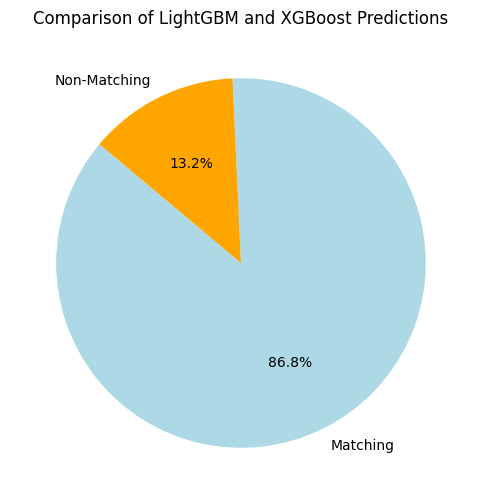

In [ ]:
# Visualize the comparison
import matplotlib.pyplot as plt
labels = ['Matching', 'Non-Matching']
values = [matching_count, total_count - matching_count]

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange'])
plt.title('Comparison of LightGBM and XGBoost Predictions')
plt.show()